## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

## DATA EXTRACTION AND CLEANUP

In [2]:
# link of the datset https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?select=Bank+Customer+Churn+Prediction.csv
# Load the datset
data = pd.read_csv('Bank Customer Churn Prediction.csv')
print(data)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [3]:
print(data.shape)

(10000, 12)


In [4]:
print(data.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [5]:
# Calculate the number of missing values in the DataFrame
missing_values = data.isnull().sum()
print(missing_values)


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [6]:
# Assigning values to country: France=0, Spain=1, and Germany=2
country_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
data['country'] = data['country'].map(country_mapping)

# Apply one-hot encoding to 'gender' column, male=0, female=1
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
# Display the first few rows of the DataFrame
print(data.head())

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       1   42       2       0.00   
1     15647311           608        1       1   41       1   83807.86   
2     15619304           502        0       1   42       8  159660.80   
3     15701354           699        0       1   39       1       0.00   
4     15737888           850        1       1   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [7]:
data = data.drop(columns = ["customer_id"])
#removed unwanted data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
credit_score        10000 non-null int64
country             10000 non-null int64
gender              10000 non-null int64
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


## EXPLORATORY DATA ANALYSIS

## 1. Can we create a model that accurately identifies which bank customers are most likely to leave (churn) based on their historical data and attributes?  

In [8]:
#ANSWER 1 Can we create a model that accurately identifies which bank customers are most likely to leave (churn) based on their historical data and attributes?

# Check data types of categorical columns before label encoding
# Extract categorical features and numerical features
categorical_features = ['country', 'gender']  # Replace these with the names of your categorical columns
numerical_features = [col for col in data.columns if col not in categorical_features + ['churn']]

# Apply label encoding to categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

# Define features and target variable
features = data.drop(columns=['churn'])
target = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 86.70%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [9]:
# Feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print feature importances
print('Feature Importances:')
print(feature_importances)


Feature Importances:
                  importance
age                 0.237320
estimated_salary    0.145701
credit_score        0.142581
balance             0.142386
products_number     0.133763
tenure              0.080481
active_member       0.040644
country             0.040100
credit_card         0.019121
gender              0.017905


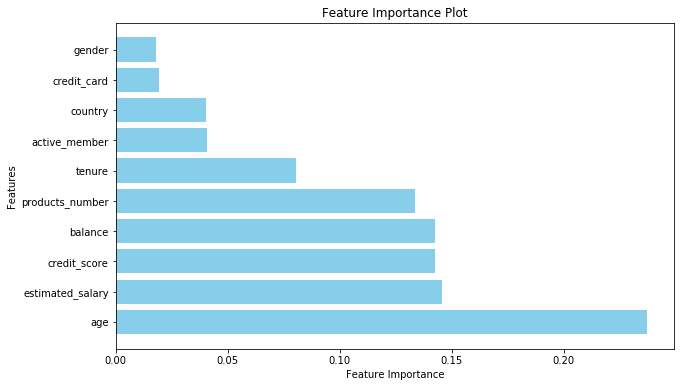

In [10]:
# Plot feature importances excluding 'customer_id'
plt.figure(figsize=(10, 6))
feature_importances = feature_importances[feature_importances.index != 'customer_id']  # Exclude 'customer_id' from the DataFrame
plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


#### Age is the most important feature with the important metric of 0.223. Gender is the least importance feature with the important metric of 0.0179.

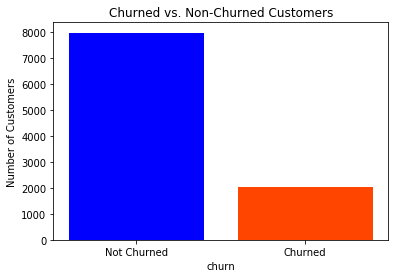

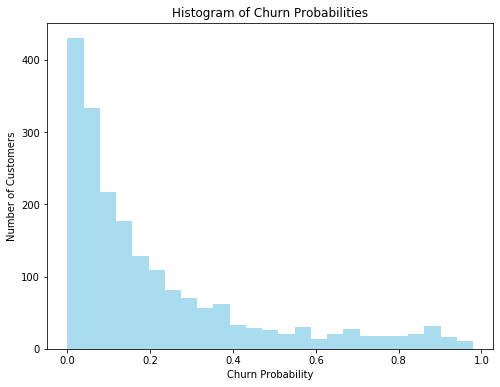

In [11]:
churn_counts = data['churn'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'orangered'])
plt.xlabel('churn')
plt.ylabel('Number of Customers')
plt.xticks(churn_counts.index, ['Not Churned', 'Churned'])
plt.title('Churned vs. Non-Churned Customers')
plt.show()
# Calculate churn probabilities
churn_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Plot histogram of churn probabilities
plt.figure(figsize=(8, 6))
plt.hist(churn_probabilities, bins=25, color='skyblue', alpha=0.7)
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.title('Histogram of Churn Probabilities')
plt.show()

#### As per the graph, 79.63% customers did not churned and 20.37% churned.

### Answer to question 1 :  Using Random Forest model, we are able to create a model that with a high certainty (86.55%) that identifies which bank customers are most likely to churn.

## 2. Are there distinct groups or segments among the bank's customers, and do these segments exhibit different churn behavior?

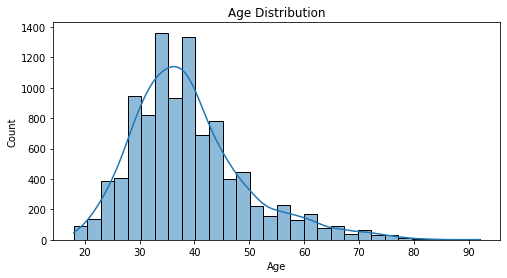

In [12]:
# Creating the age distribution plot
plt.figure(figsize=(8, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


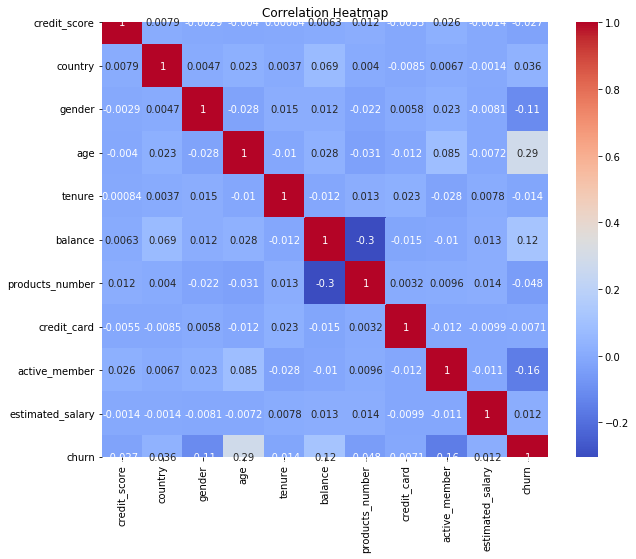

In [38]:
# Calculate the correlation matrix for the DataFrame (excluding 'customer_id')
correlation_matrix = data.drop(columns=['customer_id']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# Select the columns of interest
columns_of_interest = ['active_member', 'balance', 'age', 'gender', 'country']

# Compute the correlation matrix for the selected variables
correlation_matrix = data[columns_of_interest].corr()

# Print the correlation matrix
print(correlation_matrix)


               active_member   balance       age    gender   country
active_member       1.000000 -0.010084  0.085472 -0.022544 -0.012692
balance            -0.010084  1.000000  0.028308 -0.012087  0.348700
age                 0.085472  0.028308  1.000000  0.027544  0.048092
gender             -0.022544 -0.012087  0.027544  1.000000  0.016936
country            -0.012692  0.348700  0.048092  0.016936  1.000000


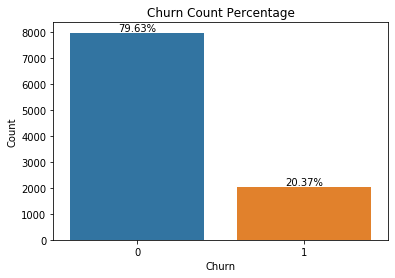

In [15]:
# Countplot of Churn with percentages
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count Percentage')

# Calculate and display percentages
total_count = len(data)
churn_count_percentage = data['churn'].value_counts()
for i, count in enumerate(churn_count_percentage):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

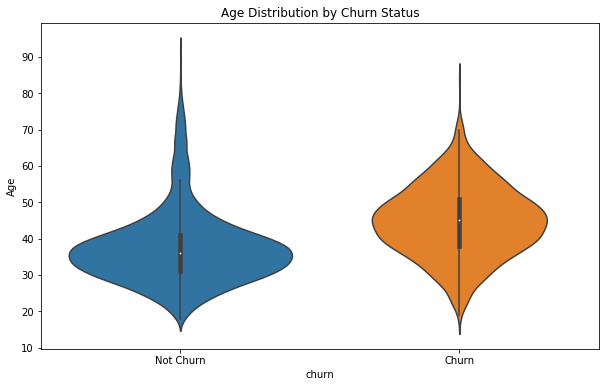

In [16]:
# Create a violin plot to visualize the age distribution by churn status
plt.figure(figsize=(10, 6))
violin = sns.violinplot(data=data, x='churn', y='age', inner='box')
plt.ylabel('Age')
plt.title('Age Distribution by Churn Status')

# Set custom x-axis labels
violin.set_xticklabels(['Not Churn', 'Churn'])

plt.show()


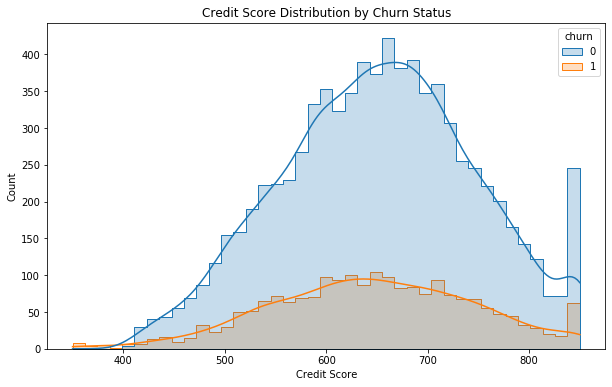

In [17]:
# Create a histogram with KDE (Kernel Density Estimate) for the 'credit_score' column by churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='credit_score', hue='churn', element='step', common_norm=False, kde=True)
plt.xlabel('Credit Score')
plt.title('Credit Score Distribution by Churn Status')
plt.show()


In [18]:
# Calculate statistics for age by churn status
age_churn_stats = data.groupby('churn')['age'].agg(['mean', 'median', 'std'])

# Display the statistics
print(age_churn_stats)


            mean  median        std
churn                              
0      37.408389      36  10.125363
1      44.837997      45   9.761562


Text(0.5, 1.0, 'Churn by Age Distribution')

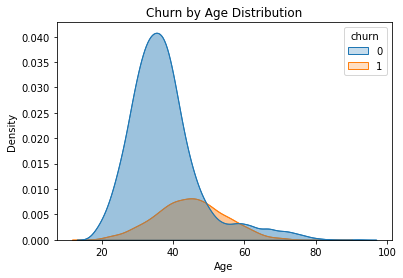

In [19]:
# Create a Kernel Density Estimate (KDE) plot for the 'age' column by churn status
sns.kdeplot(data=data, x='age', hue='churn', fill=True)
sns.kdeplot(data=data, x='age', hue='churn', fill=True)
plt.xlabel('Age')
plt.title('Churn by Age Distribution')

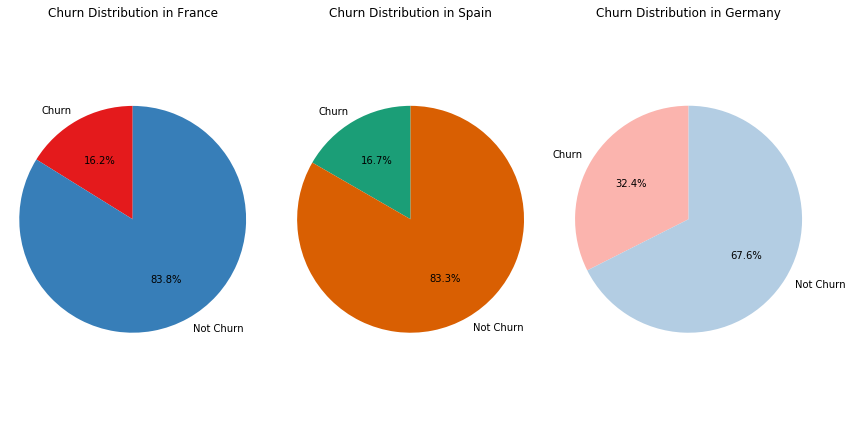

In [20]:
# Create a dictionary to map country names
country_names = {0: 'France', 1: 'Spain', 2: 'Germany'}

# Define different color palettes for each pie chart
palettes = ['Set1', 'Dark2', 'Pastel1']

# Group the data by 'country' and calculate churn counts
country_churn_counts = data[data['churn'] == 1].groupby('country').size()

# Create pie charts for each country with different color palettes
plt.figure(figsize=(12, 6))

for country_code in country_churn_counts.index:
    plt.subplot(1, 3, country_code + 1)
    labels = ['Churn', 'Not Churn']
    sizes = [country_churn_counts[country_code], len(data[data['country'] == country_code]) - country_churn_counts[country_code]]

    # Use the specified palette
    current_palette = sns.color_palette(palettes[country_code])

    plt.pie(sizes, labels=labels, colors=current_palette, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Churn Distribution in {country_names[country_code]}')

plt.tight_layout()
plt.show()


####                      German customers show the highest churn rate, while French customers have the lowest churn

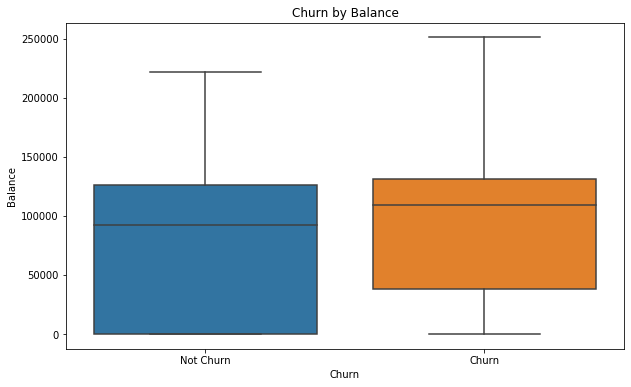

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='churn', y='balance')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Churn by Balance')

# Set custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])

plt.show()


### Answer to Question 2: Given the visualizations above, we can see there are in fact distinct groups of customers,and that customer churn is related to age, balance, country of orgin, etc. 

## 3. Which specific customer attributes or characteristics have the most significant impact on their decision to churn.?


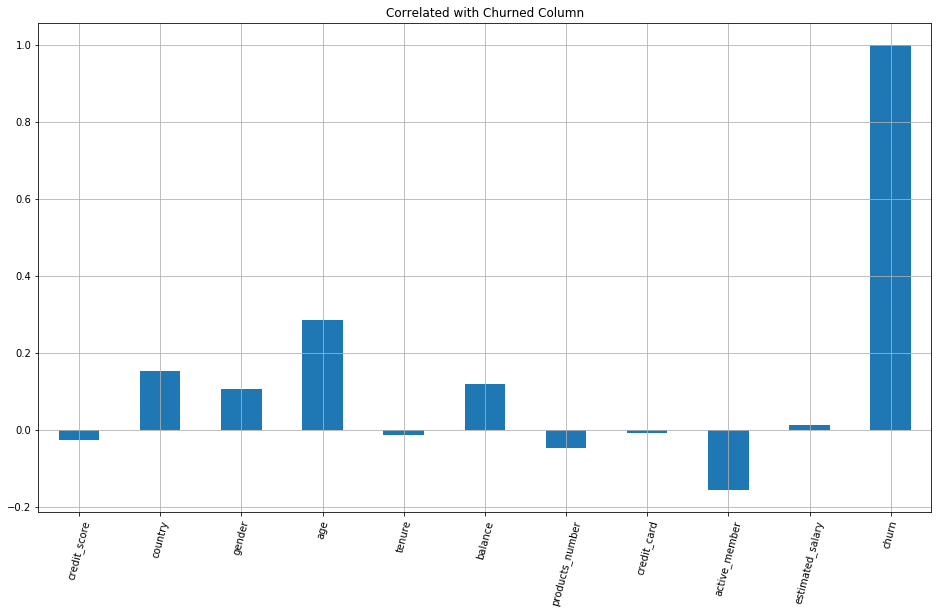

In [22]:
data.corrwith(data['churn']).plot.bar(figsize=(16,9), title='Correlated with Churned Column', rot = 75, grid = True)

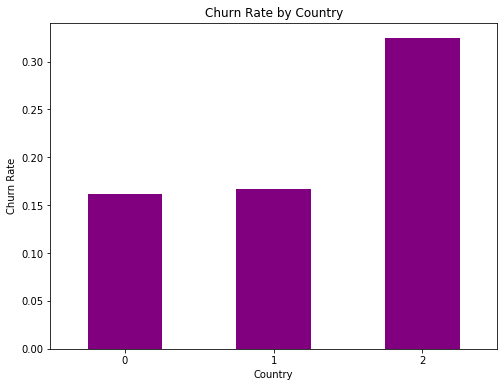

In [23]:
churn_by_country = data.groupby('country')['churn'].mean()
plt.figure(figsize=(8, 6))
churn_by_country.plot(kind='bar', color='purple')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

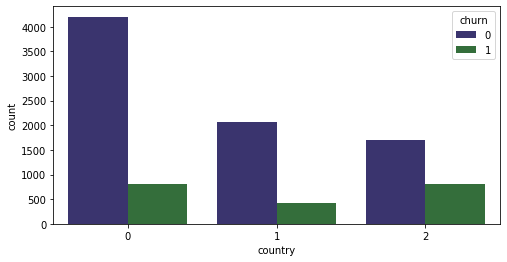

16.15% of customers from 0 has churned. 
16.67% of customers from 1 has churned. 
32.44% of customers from 2 has churned. 


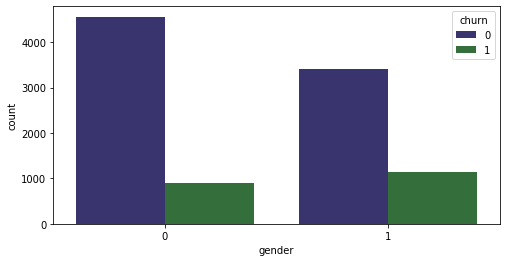

25.07% of customers who are 1 has churned. 
16.46% of customers who are 0 has churned. 


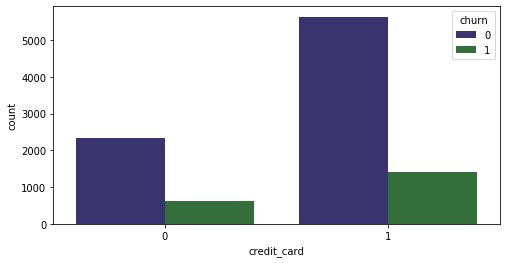

20.18% of customers who use 1 credit_card has churned. 
20.81% of customers who use 0 credit_card has churned. 


In [24]:
categoricals = ['country','gender','credit_card']
from matplotlib.font_manager import generate_fontconfig_pattern
# palette3 = ['#90A6B1', '#037d97', '#C09741']
palette3 = ['#322a78', '#2a7833', '#71782a']
def generate_cat_viz(data):
    for i in categoricals:
        plt.figure(figsize=(8,4))
        sns.countplot(data = data, x = i ,hue = "churn",palette = palette3)
        plt.show()
        for x in data[i].unique():
            churn_pcnt = len(data[(data[i] == x) & (data["churn"] == 1)]) / len(data[data[i]==x]) *100
            churn_pcnt = round(churn_pcnt,2)
            if i =="country":
                print(f"{churn_pcnt}% of customers from {x} has churned. ")
            elif i not in(["credit_card","products_number"]):
                print(f"{churn_pcnt}% of customers who are {x} has churned. ")
            else:
                print(f"{churn_pcnt}% of customers who use {x} {i} has churned. ")
generate_cat_viz(data)

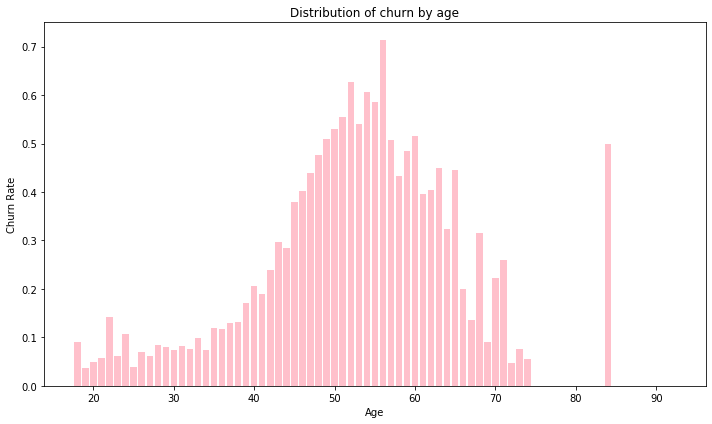

In [25]:
churn_by_age = data.groupby('age')['churn'].mean()
plt.figure(figsize=(10, 6))
plt.bar(churn_by_age.index, churn_by_age.values, color='pink')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('Distribution of churn by age')
plt.tight_layout()
plt.show()

### Answer to question 3: Yes, we can see from the visualizations on correlation plots and other distribution plots that there are patterns that indicates that many factors are reflective to churn, including gender, age, credit cards. 

## 4. Can we create detailed profiles or personas for different customer types based on their behaviour and characteristics, and how do these profiles differ for churned and non-churned customers?

In [26]:
# Converting categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['country', 'gender'])
data_encoded.info

<bound method DataFrame.info of       credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
...            ...  ...     ...        ...              ...          ...   
9995           771   39       5       0.00                2            1   
9996           516   35      10   57369.61                1            1   
9997           709   36       7       0.00                1            0   
9998           772   42       3   75075.31                2            1   
9999           792   28       4  130142.79                1            1   

      active_member  estimated_salary  churn  country_0

In [27]:
#Customer Segmentation
# Selecting relevant features for clustering
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
X = data_encoded[features]

# Choose the number of clusters (you can use techniques like Elbow method to find optimal k)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(X)

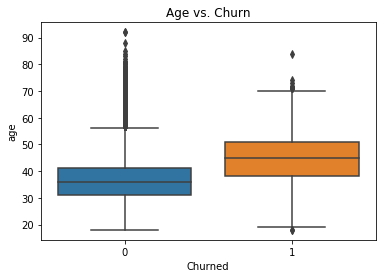

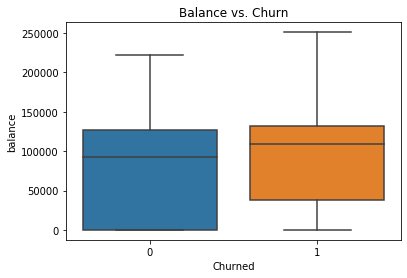

In [28]:
#Churn Analysis
#Identifying churned customers (assuming 'churn' column is binary: 1 for churned, 0 for not churned)
data_encoded['Churned'] = data_encoded['churn']

# Compare behavior and characteristics for churned vs. non-churned customers
sns.boxplot(x='Churned', y='age', data=data_encoded)
plt.title('Age vs. Churn')
plt.show()

sns.boxplot(x='Churned', y='balance', data=data_encoded)
plt.title('Balance vs. Churn')
plt.show()

In [29]:
# Creating customer personas based on clusters and churn status
persona_df = data_encoded.groupby(['Cluster', 'Churned']).agg({
    'credit_score': 'mean',
    'age': 'mean',
    'balance': 'mean',
    'products_number': 'mean',
    'estimated_salary': 'mean',
}).reset_index()

# Renaming columns for clarity
persona_df.rename(columns={'credit_score': 'Mean Credit Score',
                           'age': 'Mean Age',
                           'balance': 'Mean Balance',
                           'products_number': 'Mean Products Number',
                           'estimated_salary': 'Mean Estimated Salary'}, inplace=True)

print(persona_df)


   Cluster  Churned  Mean Credit Score   Mean Age   Mean Balance  \
0        0        0         649.630844  37.498482    2052.051998   
1        0        1         652.871698  44.947170    3791.209472   
2        1        0         654.059494  37.143038  121602.858730   
3        1        1         640.766097  44.734560  123045.274139   
4        2        0         650.782338  37.288557    2323.034608   
5        2        1         636.911661  44.869258    4303.647986   
6        3        0         651.918734  37.696322  121452.888695   
7        3        1         650.688187  44.894231  123252.799615   

   Mean Products Number  Mean Estimated Salary  
0              1.811779           49493.064487  
1              1.516981           51348.459849  
2              1.370464          149552.413633  
3              1.500657          150344.402024  
4              1.809701          148956.658949  
5              1.491166          150734.057350  
6              1.349444           50787.0866

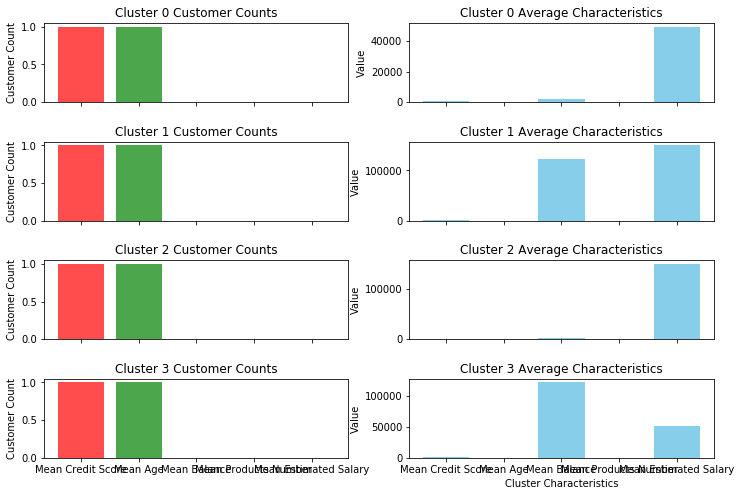

In [30]:
# Visualizing customer personas based on clusters and churn status
fig, axes = plt.subplots(nrows=k, ncols=2, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0.5)

for i in range(k):
    cluster_data = persona_df[persona_df['Cluster'] == i]
    churned_counts = cluster_data[cluster_data['Churned'] == 1]['Cluster'].count()
    non_churned_counts = cluster_data[cluster_data['Churned'] == 0]['Cluster'].count()

    axes[i, 0].bar(['Churned', 'Non-Churned'], [churned_counts, non_churned_counts], color=['red', 'green'], alpha=0.7)
    axes[i, 0].set_title(f'Cluster {i} Customer Counts')
    axes[i, 0].set_ylabel('Customer Count')

    # Visualize average characteristics
    features = ['Mean Credit Score', 'Mean Age', 'Mean Balance', 'Mean Products Number', 'Mean Estimated Salary']
    values = cluster_data[features].values[0]

    axes[i, 1].bar(features, values, color='skyblue')
    axes[i, 1].set_title(f'Cluster {i} Average Characteristics')
    axes[i, 1].set_ylabel('Value')

plt.xlabel('Cluster Characteristics')
plt.show()


### Answer to Question 4: We can in fact create customer characteristics and personas and use them to forecast churn.

## MODELS

## 1. RANDOM FOREST 

In [31]:
#ANSWER 1 Can we create a model that accurately identifies which bank customers are most likely to leave (churn) based on their historical data and attributes?
# Load the dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')
# Check data types of categorical columns before label encoding
# Extract categorical features and numerical features
categorical_features = ['country', 'gender']  # Replace these with the names of your categorical columns
numerical_features = [col for col in data.columns if col not in categorical_features + ['churn']]

# Apply label encoding to categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

# Define features and target variable
features = data.drop(columns=['churn'])
target = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, predictions))


Accuracy: 86.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### Using Random Forest model, we are able to create a model that with a high certainty (86.55%) that identifies which bank customers are most likely to churn.

## 2. K MEANS 

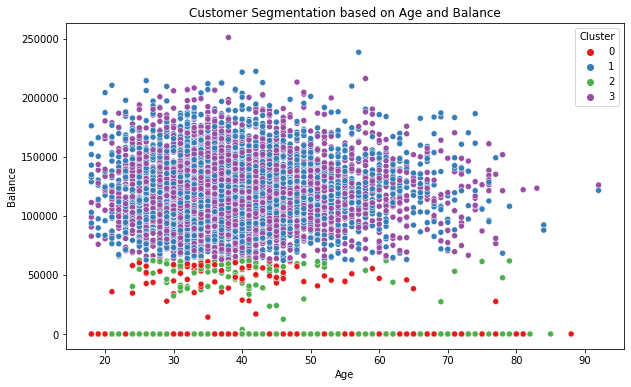

Accuracy Report:
                   Metric     Value
0  Number of Clusters (k)         4
1        Silhouette Score  0.508406


In [32]:
# Selecting relevant features for clustering
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
X = data_encoded[features]

# Choose the number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, data_encoded['Cluster'])

# Visualizing clusters based on age and balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='Cluster', data=data_encoded, palette='Set1')
plt.title('Customer Segmentation based on Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Generating an accuracy report
accuracy_report = pd.DataFrame(columns=['Metric', 'Value'])
accuracy_report.loc[0] = ['Number of Clusters (k)', k]
accuracy_report.loc[1] = ['Silhouette Score', silhouette_avg]

print("Accuracy Report:")
print(accuracy_report)

### Using K-Means model, we are able to create segmentation based on age and balance that successfully forecast customer churn with a high confidence. 


## GRADIENT BOOSTING 

In [33]:
# Data preprocessing
X = data.drop(columns=['churn', 'customer_id'])  # Exclude non-predictive columns
y = data['churn']


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='roc_auc')
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_


In [36]:
# Initialize an empty list to store model results
model_results = []

# Train and evaluate the best models
models = {
    'Gradient Boosting': gb_best_model,
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred, output_dict=True)

    # Store the results in a dictionary
    result = {
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Confusion Matrix': confusion
    }
    model_results.append(result)

# Convert the list of dictionaries to a Pandas DataFrame
results_df = pd.DataFrame(model_results)

# Define a function to highlight the maximum value in a column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

styled_results = results_df.style.apply(highlight_max, subset=['Accuracy'])

# Display the styled DataFrame
styled_results


,Model,Accuracy,ROC AUC,Confusion Matrix
0,Gradient Boosting,0.8655,0.870747,[[1547 60] [ 209 184]]


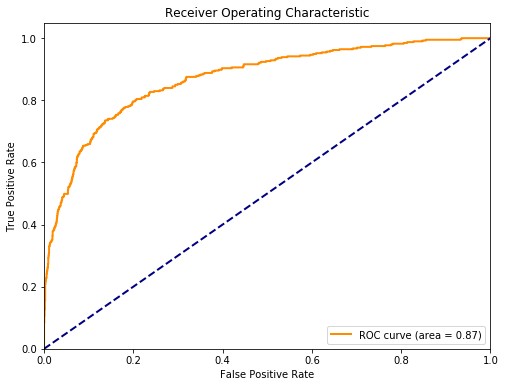

In [37]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### With Gradient Boosting model, it further analyzed the answer to Question 2, where we created different segment and characteristics of customers based on their historical data and use it to predict churn differently.